# <b><u>Project Title : Car Prices Analysis and Modeling </u></b>

## Importing required libraries 

In [1]:
import numpy as np               
import pandas as pd              
import seaborn as sns             
import matplotlib.pyplot as plt   

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv("/Users/vkc/Downloads/car_price_prediction.csv")
#df = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')

In [3]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.shape

(19237, 18)

In [7]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [8]:
# Dropping for the duplicate rows
df = df.drop_duplicates()      

In [9]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [10]:
df['Levy'].value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
970        1
916        1
173        1
4860       1
1028       1
Name: Levy, Length: 559, dtype: int64

In [11]:
# Remove the dash with 0 in Levy and change datatype to integer
df.loc[df['Levy'] == '-', 'Levy'] = 0
df['Levy'] = df['Levy'].astype(int) 
df.info()      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [12]:
df['Mileage'].value_counts()

0 km         714
200000 km    181
150000 km    159
160000 km    120
180000 km    117
            ... 
63905 km       1
58776 km       1
135800 km      1
16352 km       1
1878 km        1
Name: Mileage, Length: 7687, dtype: int64

In [13]:
# Remove km from  Mileage column
df['Mileage'] = df['Mileage'].apply(lambda x : int(x.split()[0]))

In [14]:
df['Engine volume'].value_counts()

2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
0.8 Turbo       1
6.7             1
6.8             1
5.8             1
0.3 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [15]:
turbo_eng = df[df['Engine volume'].str.contains('Turbo')]['Engine volume'].value_counts().sum()
print(f"Out of {df.shape[0]} cars {turbo_eng} - {round((100*turbo_eng)/df.shape[0])}% have turbo engine.")

Out of 18924 cars 1892 - 10% have turbo engine.


Almost 10% of cars have turbo engine, so this data cant be ignored. Instead create a new feature column that tells whether the car has turbo engine or not.

In [16]:
df['engine_turbo'] = np.where(df['Engine volume'].str.contains('Turbo'), 1, 0)

In [17]:
# Remove Turbo from  Engine volume column and convert the data in float
df['Engine volume'] = df['Engine volume'].apply(lambda x : float(x.split()[0]))
df.info()                                  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [18]:
df['Doors'].value_counts()

04-May    18032
02-Mar      768
>5          124
Name: Doors, dtype: int64

In [19]:
# The values in door columns are in datetime format, so converted it back to proper format.
def door(value):
    if value == '04-May':
        return "4-5"
    elif value == '02-Mar':
        return "2-3"
    elif value == '>5':
        return "5+"

df['Doors'] = df['Doors'].apply(lambda x : door(x))
df['Doors'].value_counts()

4-5    18032
2-3      768
5+       124
Name: Doors, dtype: int64

In [20]:
# Change the name of columns
df = df.rename(columns={'Price': 'price', 'Levy': 'levy', 'Manufacturer': 'manufacturer', 
                        'Model': 'model', 'Prod. year': 'prd_yr', 'Category': 'category', 
                        'Leather interior': 'leather_intr', 'Fuel type': 'fuel_typ', 
                        'Engine volume': 'engine_vol', 'Mileage': 'mileage(km)' , 'Cylinders': 'cylinders',
                        'Gear box type': 'gear_box', 'Drive wheels': 'drive_wheels', 'Doors': 'doors',
                        'Wheel': 'wheel', 'Color' : 'color', 'Airbags' : 'airbags'
                       })

In [21]:
# Drop the reduntant column ID
df = df.drop(['ID'], axis = 1) 

# <u>**Exploratory Data Analysis** </u>

In [22]:
df.head()

,price,levy,manufacturer,model,prd_yr,category,leather_intr,fuel_typ,engine_vol,mileage(km),cylinders,gear_box,drive_wheels,doors,wheel,color,airbags,engine_turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0


In [23]:
# Lets define the numerical and categorical columns
num_col = ['levy', 'prd_yr', 'engine_vol', 'mileage(km)', 'airbags']
cat_col  = ['manufacturer', 'model', 'category', 'leather_intr', 'fuel_typ', 'gear_box', 'drive_wheels', 'doors', 'color', 'engine_turbo']

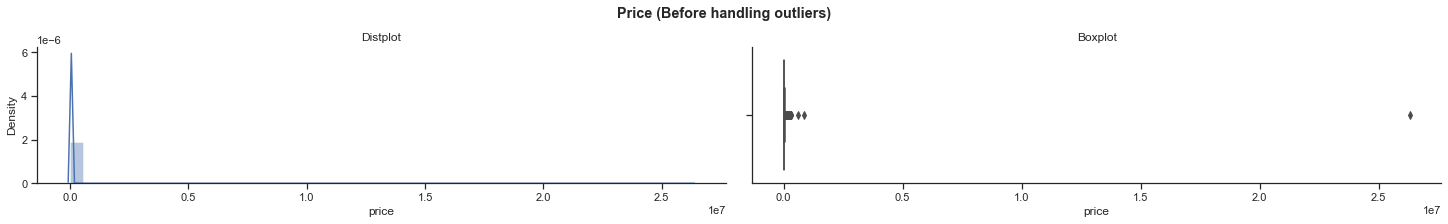

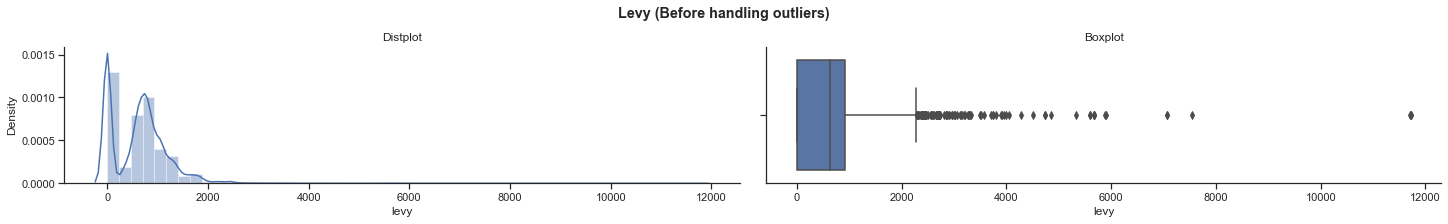

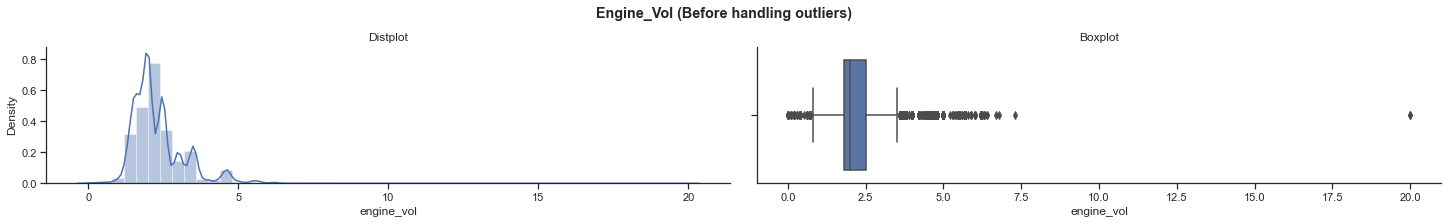

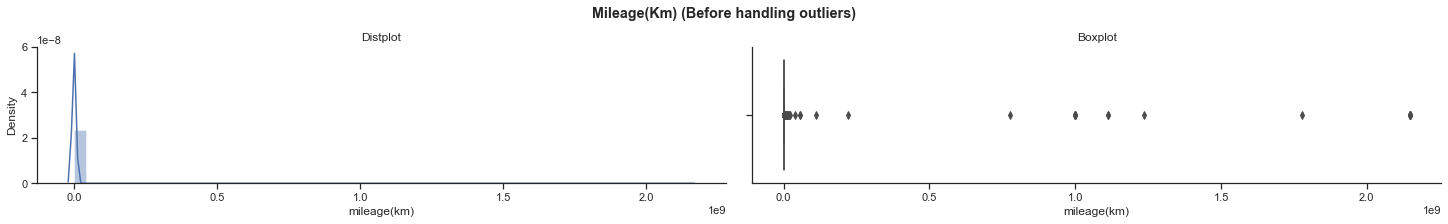

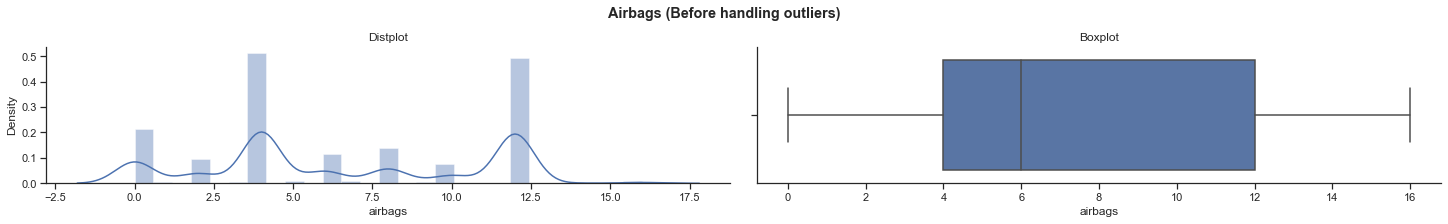

In [24]:
num_col = ['price', 'levy',  'engine_vol', 'mileage(km)', 'airbags']

#Plotting Graphs to check for Outliers in numerical columns
for col in num_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(df[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(df[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

In [25]:
# Function to get amount of outliers in numerical columns

def outlier_prcnt(df, col_list):
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        
        # Print outliers percentage using IQR method
        outliers = ((df[col_name] > fence_high) | (df[col_name] < fence_low)).sum()
        total = df[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")


outlier_prcnt(df, num_col)

Total outliers in price are: 1055 - 5.57%.
Total outliers in levy are: 160 - 0.85%.
Total outliers in engine_vol are: 1358 - 7.18%.
Total outliers in mileage(km) are: 635 - 3.36%.
Total outliers in airbags are: 0 - 0.0%.


In [26]:
def outlier_handle(df, col_list):
    df_new = df.copy()
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        
         # Capping Outliers using IQR method
        df_new.loc[:,  col_name] = np.where(df[col_name]> fence_high, fence_high,np.where(df[col_name]< fence_low, fence_low,df[col_name]))
        outliers = ((df[col_name] > fence_high) | (df[col_name] < fence_low)).sum()
        total = df[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")
    return df_new

df = outlier_handle(df, num_col)

Total outliers in price are: 1055 - 5.57%.
Total outliers in levy are: 160 - 0.85%.
Total outliers in engine_vol are: 1358 - 7.18%.
Total outliers in mileage(km) are: 635 - 3.36%.
Total outliers in airbags are: 0 - 0.0%.


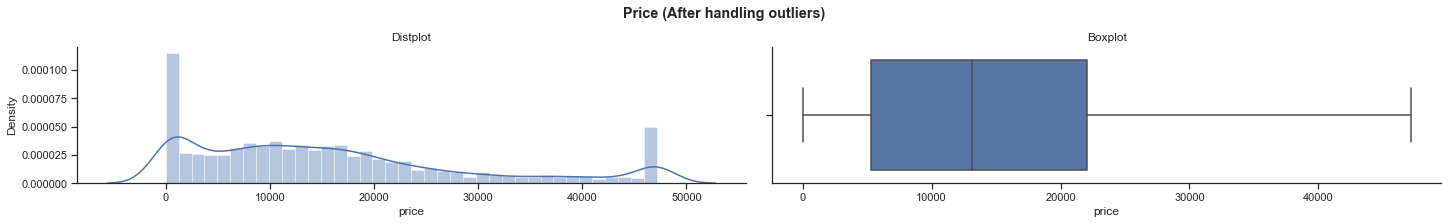

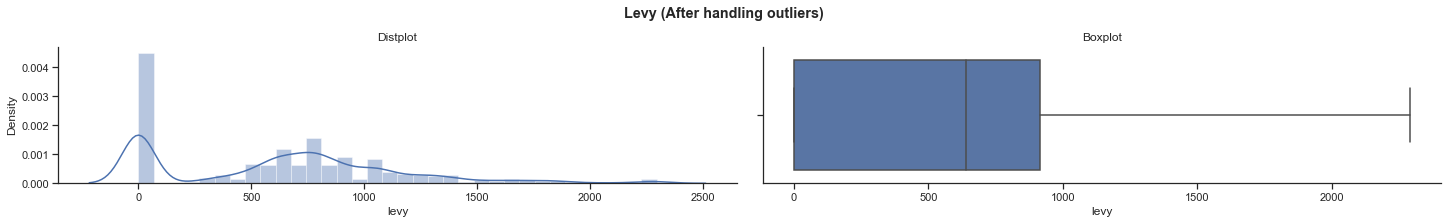

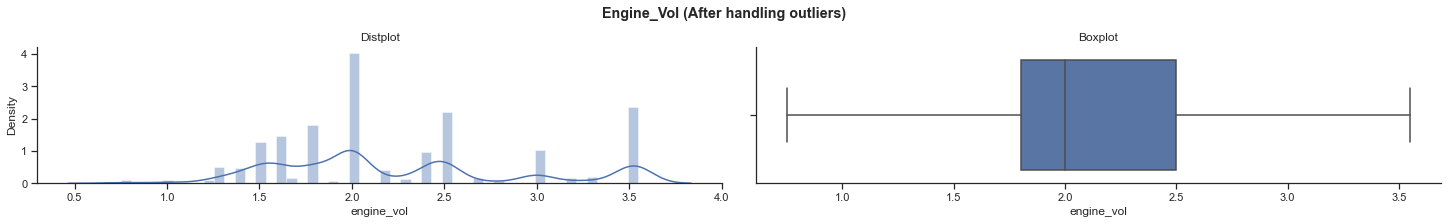

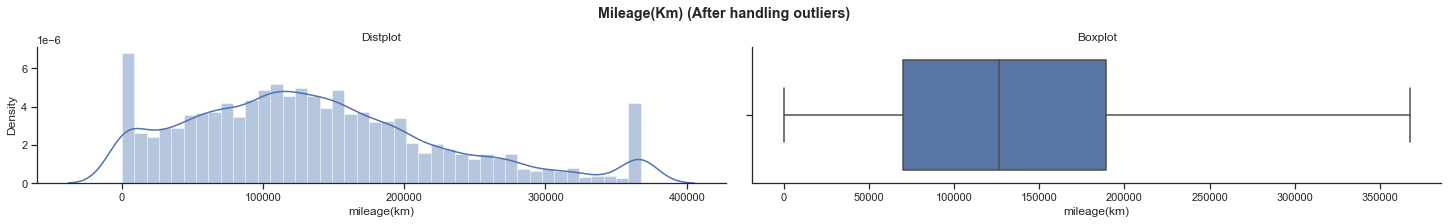

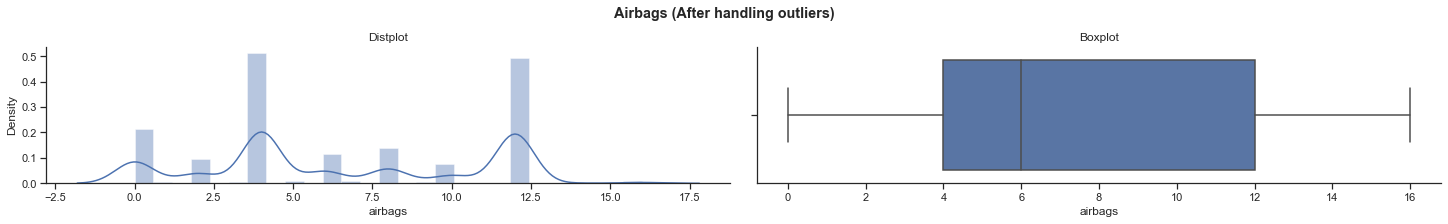

In [27]:
#Plotting Graphs After treating outliers of numnerical features
for col in num_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(df[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(df[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    fig.show()

**Conclusions:** Note: From the above density plot of varierty of cars we make the following conclusions.
1. Mileage, levy, and the price are right skewed
2. The varierty of car for particular values of airbags are very high.
3. The varierty of car for particular values of engine volume are very high.

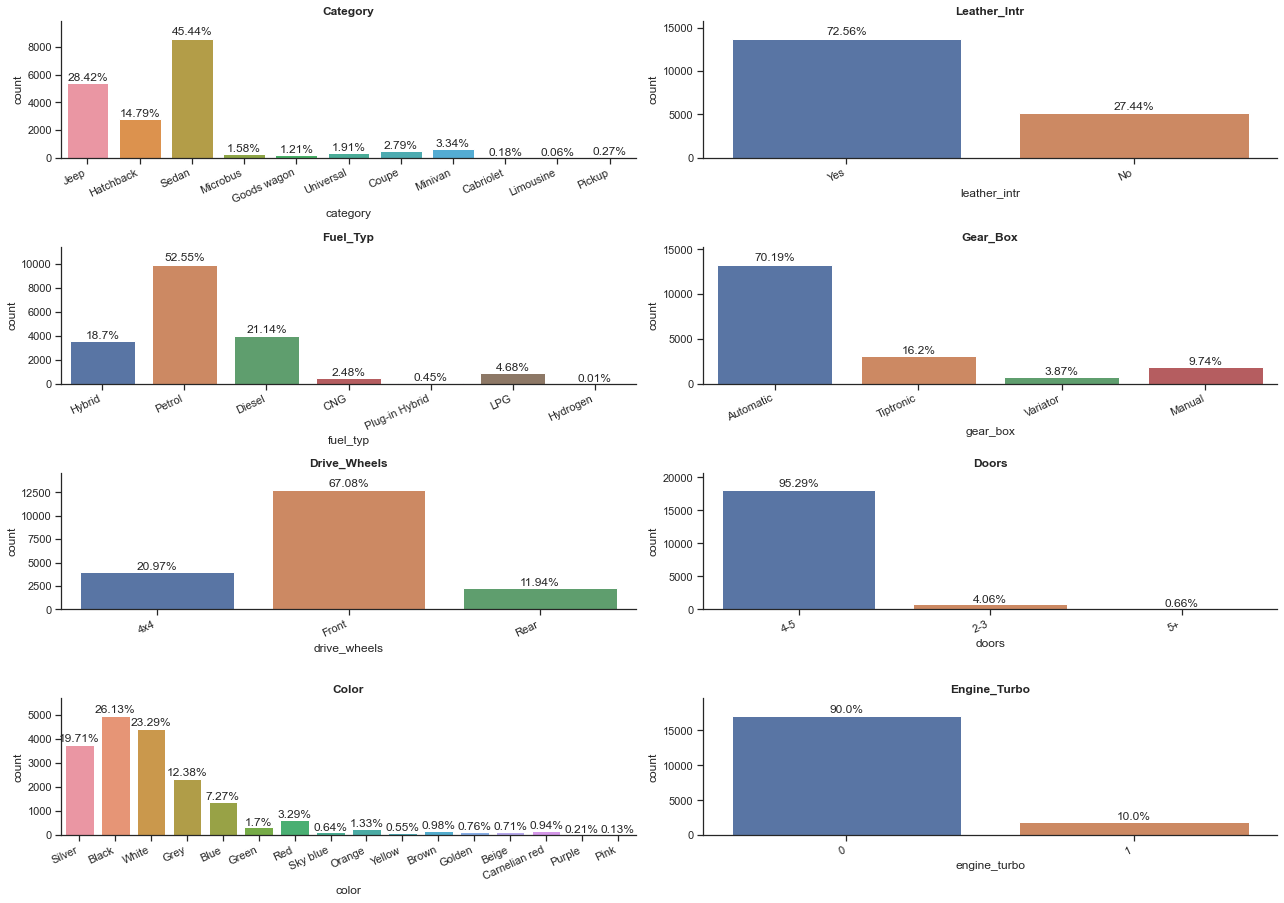

In [28]:
# Defining a function to calculate the percent count of each value on the bars
def percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()*1.015
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')


cat_col  = ['category', 'leather_intr', 'fuel_typ', 'gear_box', 'drive_wheels', 'doors', 'color', 'engine_turbo']

r = int(len(cat_col)/2 +1)

# Plotting the countplots for each feature variable
plt.figure(figsize=(18,r*3))
for n,column in enumerate(cat_col):
    plot = plt.subplot(r,2,n+1)
    sns.countplot(df[column]).margins(y=0.15)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='right')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    percent(plot)

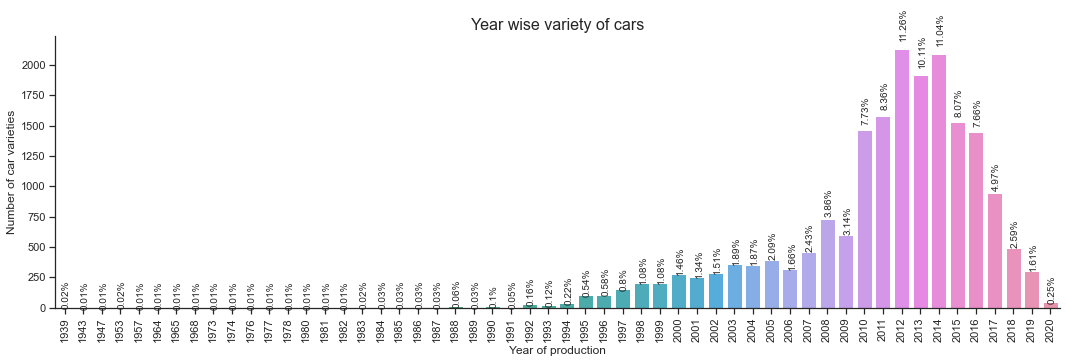

In [29]:
df1 = df.copy()  
df2 = df1.groupby(by= ['prd_yr'], as_index=False).count().sort_values(by='prd_yr', ascending=True)[['prd_yr','price']]
df2 = df2.rename(columns={'price': 'count'})
df2['prd_yr_per'] = round(df2['count']/sum(df2['count'])*100,2)


plt.figure(figsize=(18,5))
plot = sns.barplot(x = 'prd_yr', y = 'count',  data = df2)
plt.title('Year wise variety of cars', fontsize=16)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel('Year of production', fontsize=12)
plt.ylabel('Number of car varieties', fontsize=12)


for i,p in enumerate(plot.patches):
        percentage = df2['prd_yr_per'][i]
        x = p.get_x() + p.get_width() / 3
        y = p.get_height()*1.04
        plot.annotate(f'{percentage}%', (x, y), size = 10, rotation=90)
plt.show()

**Conclusions:** From the above bar plot of varierty of cars we make the following conclusions.
1. The quantity of car varients are gradualy increases year by year and then sharply decreases after 2014.
2. The quantity of car varients are maximum from 2012 to 2014 and then it started falling down.

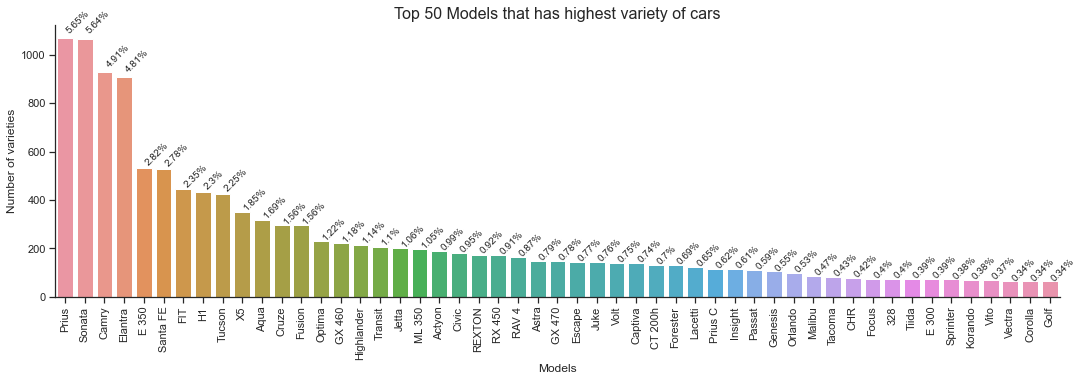

In [30]:
model_count_df = df['model'].value_counts().to_frame().reset_index()
model_count_df['model_per'] = round(model_count_df['model']/sum(model_count_df['model'])*100,2)


plt.figure(figsize=(18,5))
plot = sns.barplot(x = 'index', y = 'model',  data = model_count_df.loc[:50,:])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('Top 50 Models that has highest variety of cars', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Number of varieties', fontsize=12)

for i,p in enumerate(plot.patches):
        percentage = model_count_df['model_per'][i]
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()*1.02
        plot.annotate(f'{percentage}%', (x, y), size = 10, rotation=45)
plt.show()

**Conclusions:** From the above bar plot of varierty of cars we make the following conclusions.
1. The models Prius, Sonata, Camry, Elantra are among highest sold models.
2. Out of 1590 models, these four contribute to 21% of car models.

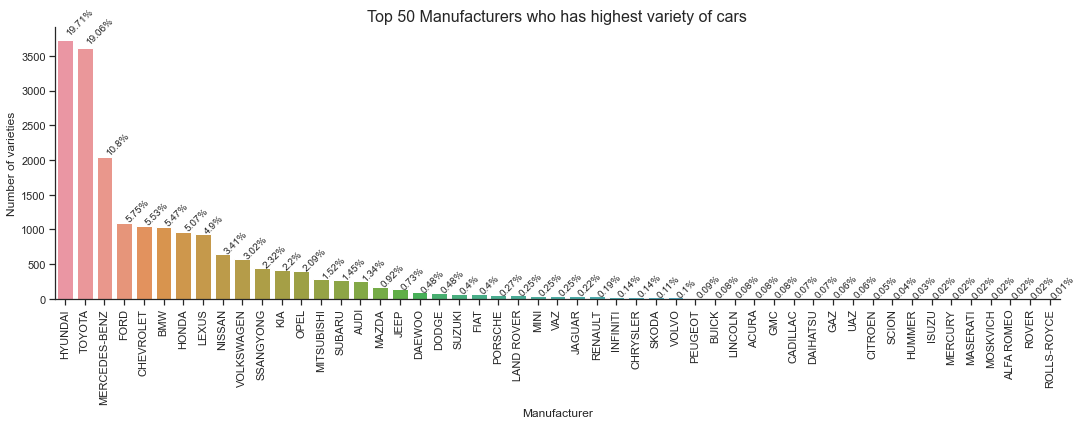

In [31]:
manufacturer_count_df = df['manufacturer'].value_counts().to_frame().reset_index()
manufacturer_count_df['manufacturer_per'] = round(manufacturer_count_df['manufacturer']/sum(manufacturer_count_df['manufacturer'])*100,2)


plt.figure(figsize=(18,5))
plot = sns.barplot(x = 'index', y = 'manufacturer',  data = manufacturer_count_df.loc[:50,:])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('Top 50 Manufacturers who has highest variety of cars', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Number of varieties', fontsize=12)


for i,p in enumerate(plot.patches):
        percentage = manufacturer_count_df['manufacturer_per'][i]
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()*1.02
        plot.annotate(f'{percentage}%', (x, y), size = 10, rotation=45)
plt.show()

**Conclusions:** From the above bar plot of varierty of cars we make the following conclusions.
1. The largest manufacturers are Hyundai, Toyota, Mercedes-Benz.
2. Out of 65 manufacturers, these 3 produces 48.8% of car variants.

## Bivariate Variable Analysis

### Production year wise analysis of each feature

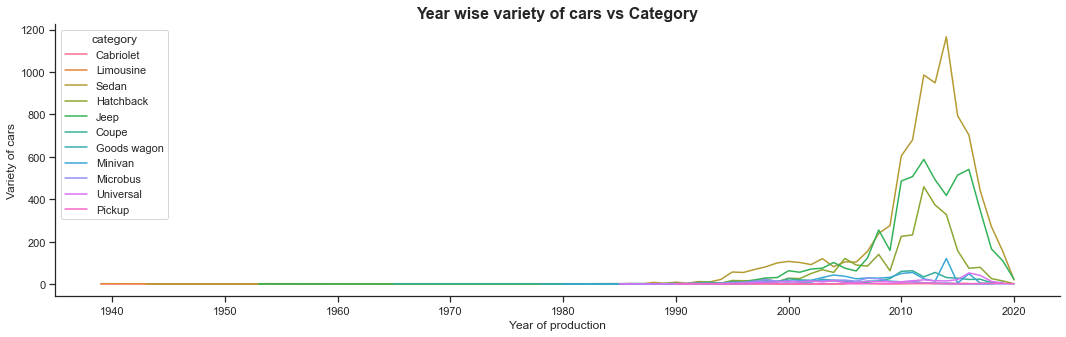

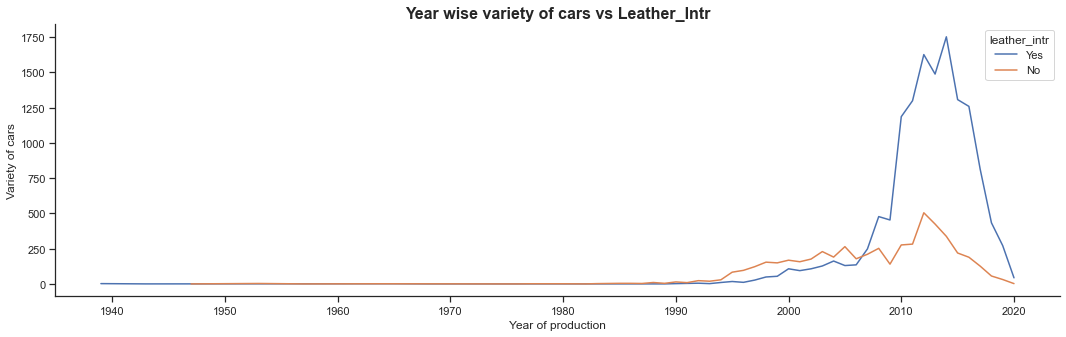

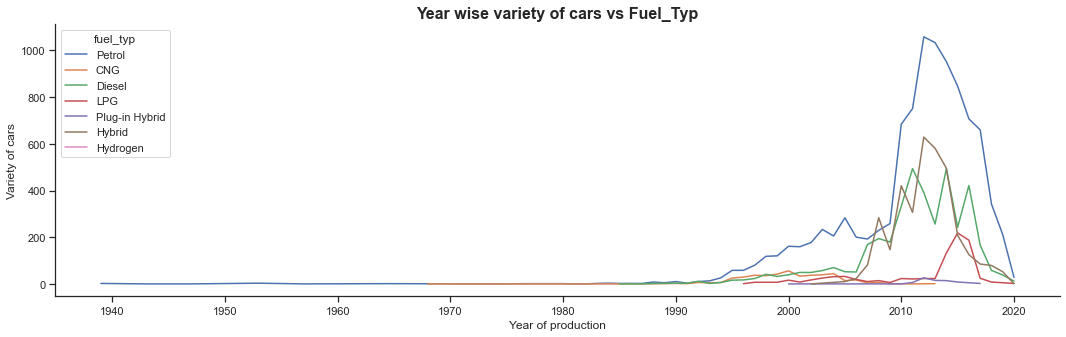

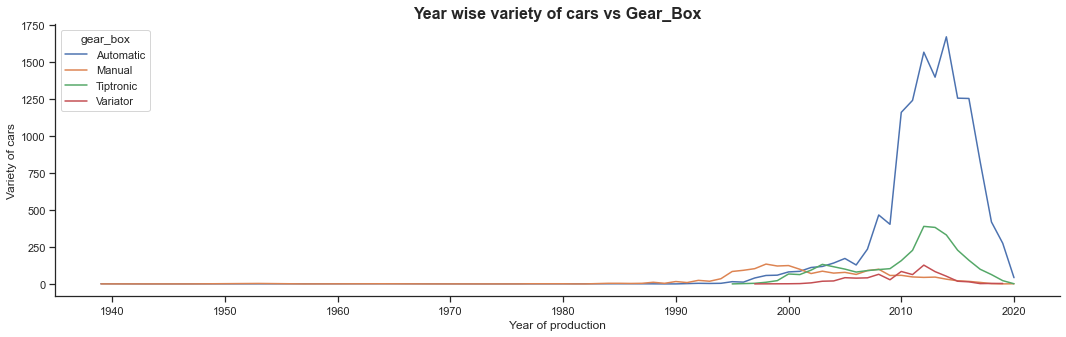

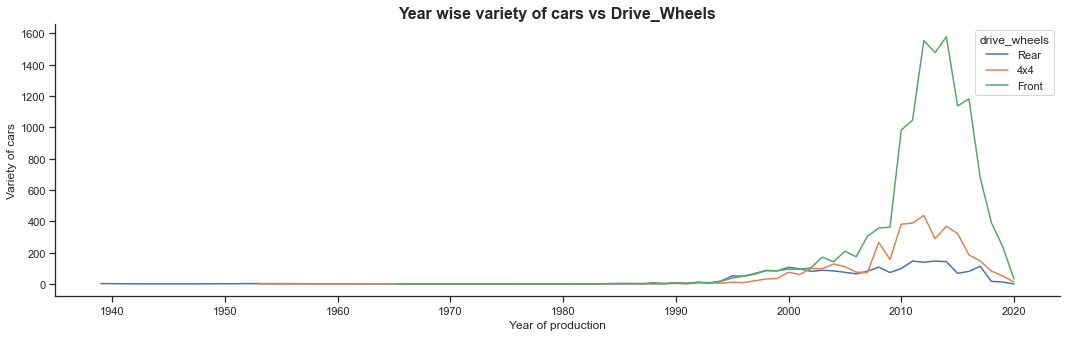

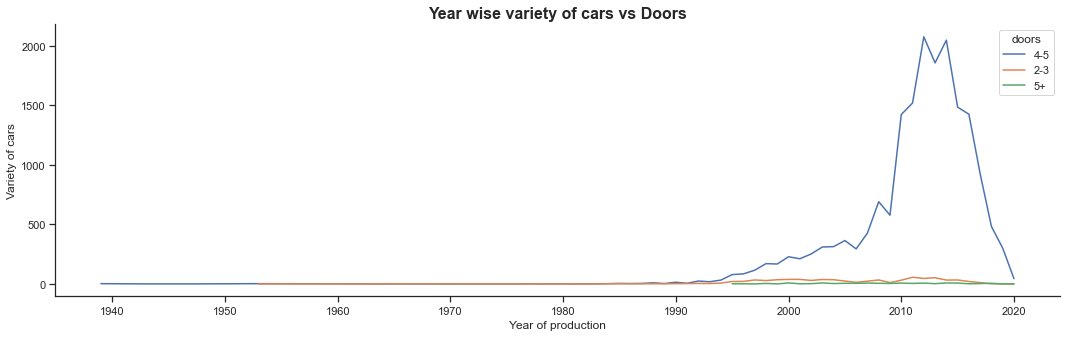

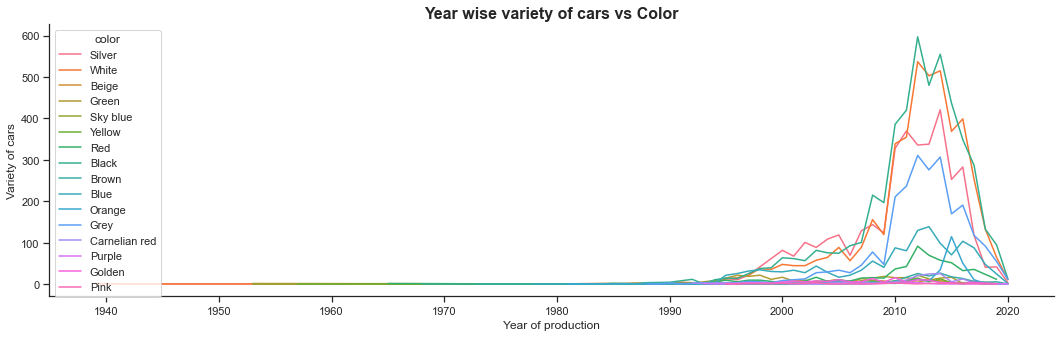

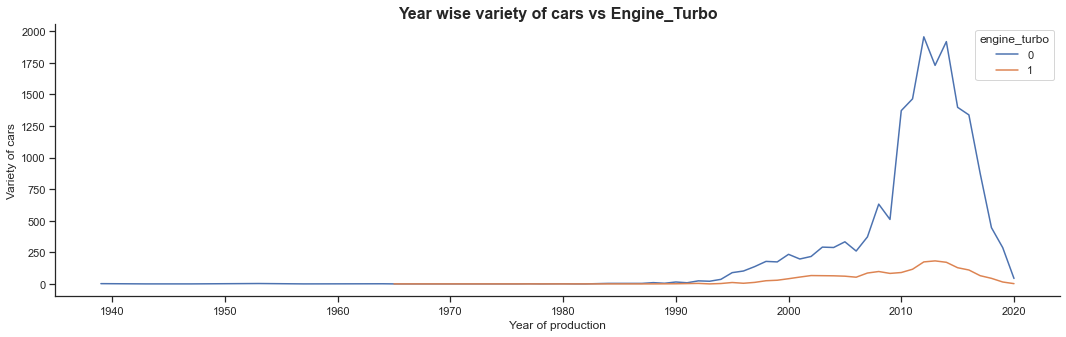

In [32]:
for hue in cat_col:
    plt.figure(figsize=(18,5))
    df1 = df[['prd_yr',hue, 'price']].groupby(by= ['prd_yr',hue], as_index=True).count().reset_index()
    plot = sns.lineplot(x = 'prd_yr', y = 'price',  data = df1, hue = hue)
    plt.title(f'Year wise variety of cars vs {hue.title()}', fontsize=16,weight='bold')
    plt.xlabel('Year of production', fontsize=12)
    plt.ylabel('Variety of cars', fontsize=12)
    plt.show()

In [33]:
cat_col

['category',
 'leather_intr',
 'fuel_typ',
 'gear_box',
 'drive_wheels',
 'doors',
 'color',
 'engine_turbo']

### Mean Price-wise analysis of each feature

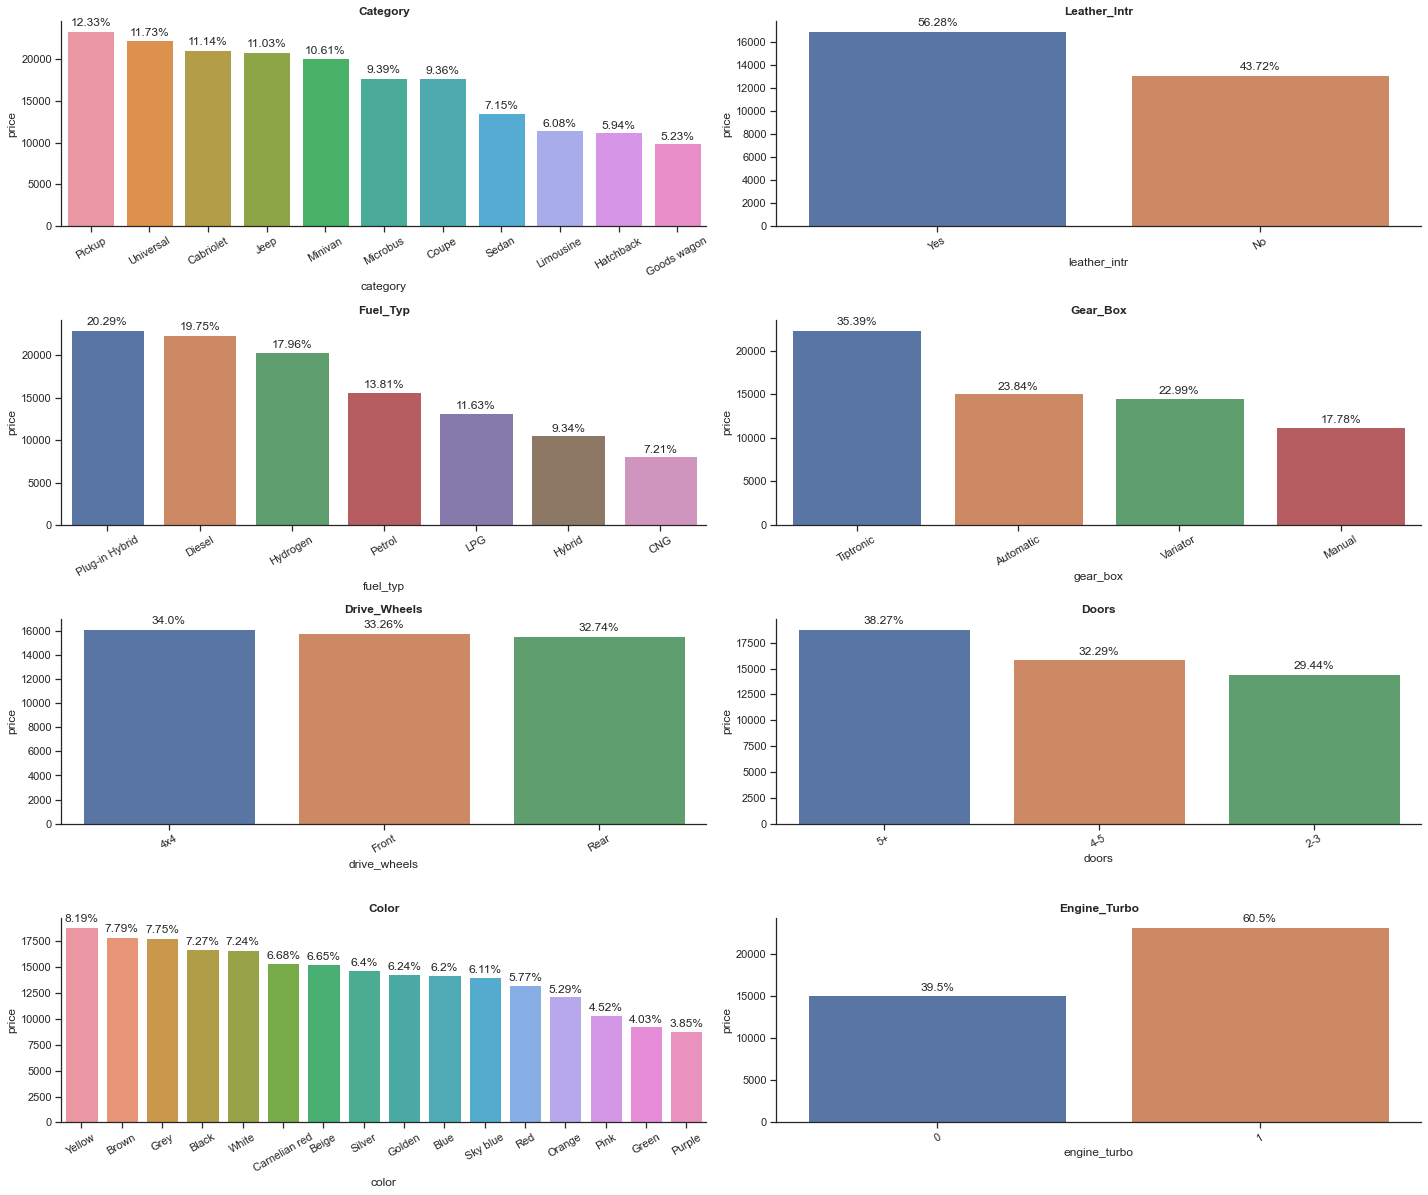

In [34]:
r = int(len(cat_col)/2 +1)

# Plotting the countplots for each target variable
plt.figure(figsize=(20,r*4))
for n,column in enumerate(cat_col[:]):
    df1 = df[['price', column]].groupby(by= [column], as_index=False).agg('mean').sort_values(by='price', ascending=False)
    plot = plt.subplot(r,2,n+1)
    sns.barplot(x =df1[column], y= df1['price'])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    percent(plot)

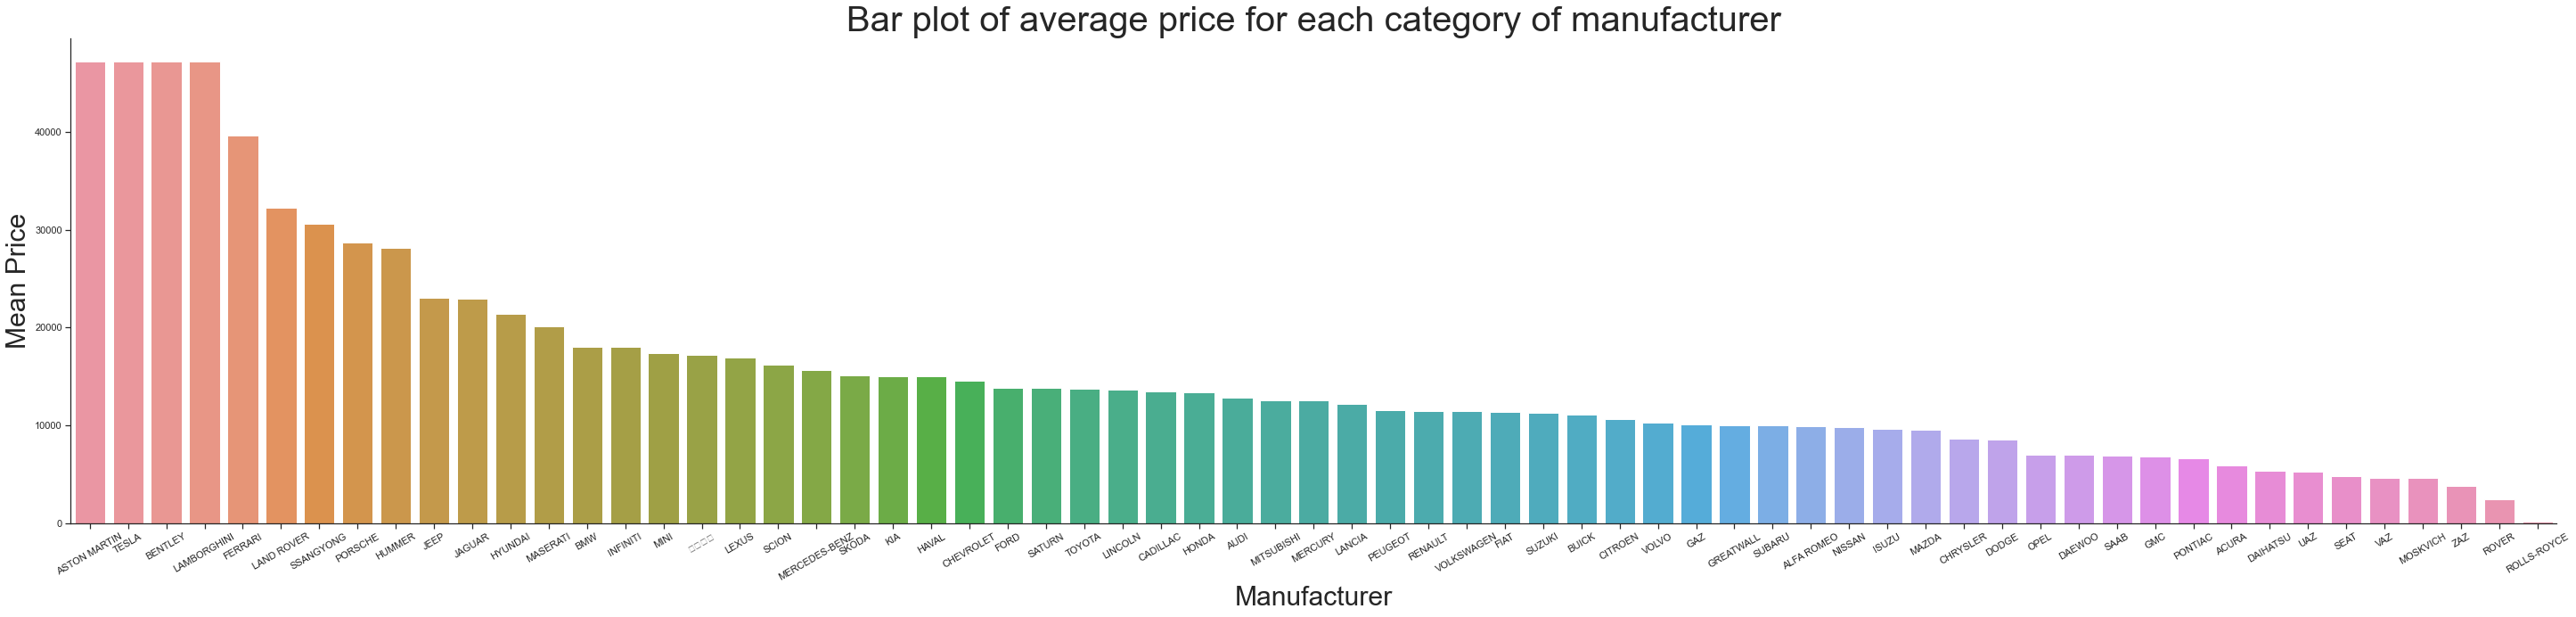

In [35]:
df1 = df[['price', 'manufacturer']].groupby(by= ['manufacturer'], as_index=False).agg('mean').sort_values(by='price', ascending=False)

plt.figure(figsize=(50,10))

plot = sns.barplot(x="manufacturer", y="price", data=df1)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.title('Bar plot of average price for each category of manufacturer', fontsize=40)
plt.xlabel('Manufacturer', fontsize=30)
plt.ylabel('Mean Price', fontsize=30)

plt.show()

**Conclusions:** From the above bar plots of mean price of cars we make the following conclusions.
The Average price for the following manufacturer is highest.
- Aston Martin
- Testla
- Bentley
- Lamborghini

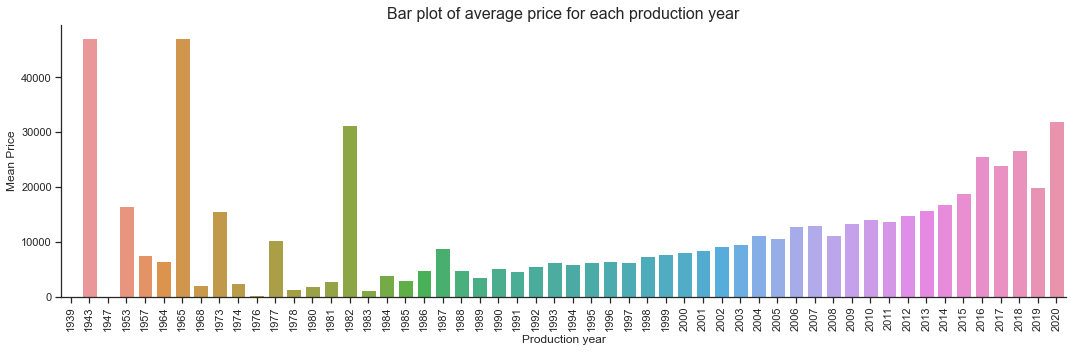

In [36]:
df1 = df[['price', 'prd_yr']].groupby(by= ['prd_yr'], as_index=False).agg('mean').sort_values(by='price', ascending=False)

plt.figure(figsize=(18,5))
plot = sns.barplot(x="prd_yr", y="price", data=df1)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('Bar plot of average price for each production year', fontsize=16)
plt.xlabel('Production year', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.show()

**Conclusions:** From the above bar plots of mean price of cars we make the following conclusions.
- Generally, the average price of cars is increasing every year. 
- In the year, 1973, 1977, 1982, the average price of the car is very highly unusual. It will act as outlier in our ML model, so its better to delete these values.

In [37]:
df1 = df[(df['prd_yr'] == 1973) | (df['prd_yr'] == 1977) | (df['prd_yr'] == 1982) | (df['prd_yr'] == 1987)].sort_values(by='price', ascending=False)
df1

,price,levy,manufacturer,model,prd_yr,category,leather_intr,fuel_typ,engine_vol,mileage(km),cylinders,gear_box,drive_wheels,doors,wheel,color,airbags,engine_turbo
14297,31361.0,0.0,SUZUKI,Samurai,1982,Jeep,No,Petrol,0.80,29500.0,3.0,Manual,4x4,2-3,Left wheel,Blue,1.0,0
14175,20385.0,0.0,MERCEDES-BENZ,G 230 2.2cdi,1987,Jeep,No,Diesel,2.20,243567.0,4.0,Manual,4x4,4-5,Left wheel,Black,0.0,0
457,15681.0,0.0,GAZ,32214,1977,Limousine,No,Petrol,2.40,11111.0,6.0,Manual,Rear,4-5,Left wheel,Black,0.0,0
17634,15681.0,0.0,CHEVROLET,Impala,1973,Limousine,Yes,Petrol,3.55,100000.0,8.0,Automatic,Rear,4-5,Left wheel,Brown,0.0,0
9540,10036.0,0.0,UAZ,31514,1987,Jeep,Yes,Petrol,2.00,0.0,4.0,Manual,4x4,4-5,Left wheel,Green,4.0,0
6303,6899.0,0.0,UAZ,31514,1987,Microbus,No,CNG,2.40,354000.0,4.0,Manual,4x4,4-5,Left wheel,Green,6.0,0
17281,5000.0,0.0,VAZ,2106,1977,Sedan,No,Petrol,1.60,37500.0,4.0,Manual,Rear,4-5,Left wheel,Sky blue,0.0,0
13190,4000.0,0.0,UAZ,31514,1987,Jeep,No,Petrol,2.90,120000.0,4.0,Manual,4x4,4-5,Left wheel,Blue,9.0,0
16083,2822.0,0.0,MERCEDES-BENZ,A 190,1987,Sedan,No,Petrol,2.00,240000.0,4.0,Manual,Rear,4-5,Left wheel,Green,0.0,0


In [38]:
# The years 1973, 1977, 1982, 1987 which have prices above 10000 have been removed.
df2 = df1[df1['price']>10000]
df = df.drop(df2.index)

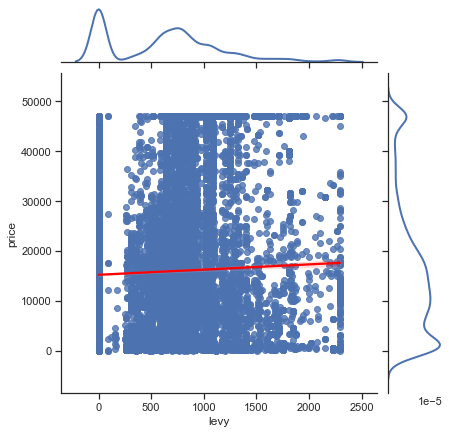

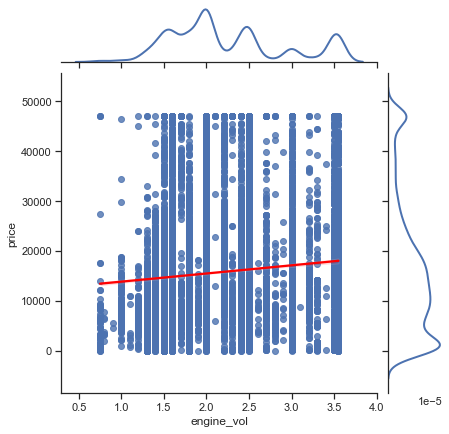

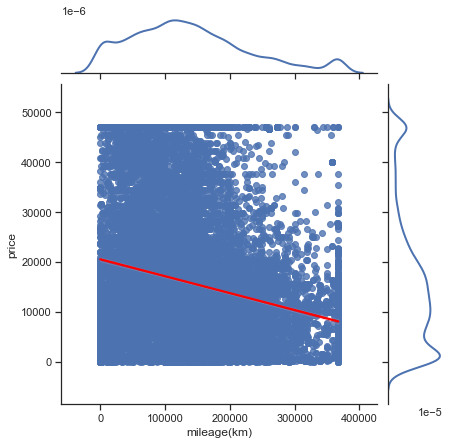

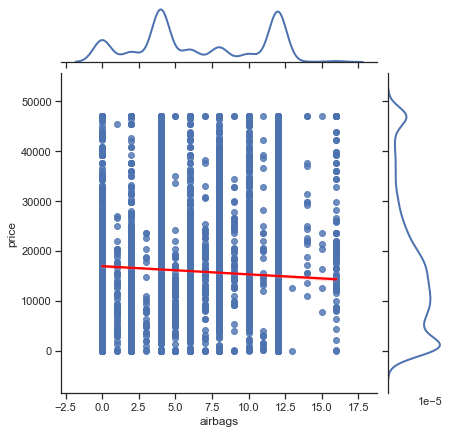

In [39]:
# The jointplot of distribution, scatter plot, and the regression line of mean price and numerical columns.
for col in num_col[1:]:
    g = sns.JointGrid()
    sns.regplot(x=df[col], y=df["price"],line_kws={"color": "red"}, ax=g.ax_joint)
    sns.kdeplot(y=df["price"], linewidth=2, ax=g.ax_marg_y)
    sns.kdeplot(x=df[col], linewidth=2, ax=g.ax_marg_x)
    plt.show()

## Multi-Variant Analysis


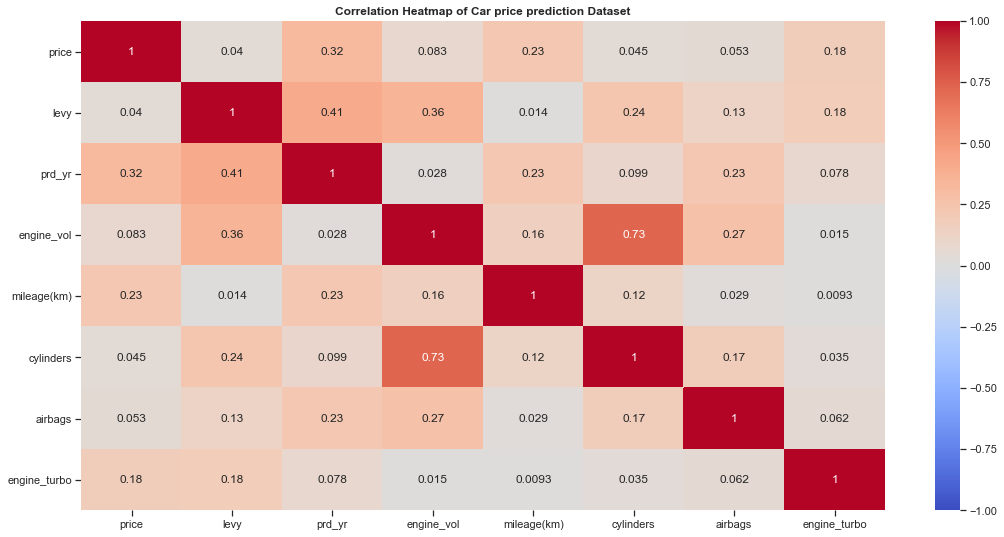

In [40]:
# Correlation Analysis
plt.figure(figsize=(18,9))
plot = sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm',vmin=-1)
plt.title('Correlation Heatmap of Car price prediction Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

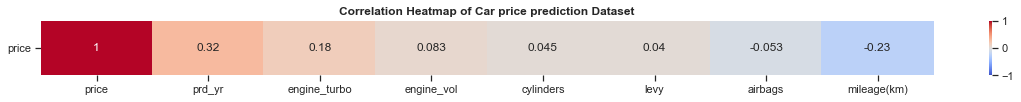

In [41]:
# Correlation Analysis for target variable 'Price'. 
Target_corr  = df.corr().loc[:, 'price'].to_frame().sort_values(by = 'price' , ascending=False).T
plt.figure(figsize=(20,1))
plot = sns.heatmap(Target_corr, annot=True, cmap='coolwarm', vmin = -1)
plt.title('Correlation Heatmap of Car price prediction Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

## Feature Extraction

## Removing Multi-collinearity

In [42]:
  # Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.set_index('Variables')

    return(vif)

In [43]:
df_prepar = df.copy().drop(['price'], axis = 1)
print("VIF without removing anything:")
print(calc_vif(df_prepar[[i for i in df_prepar.describe().columns]]))
print("="*40+"||")
df_prepar = df_prepar.drop(['cylinders'], axis = 1)
print("VIF after removing 'cylinders'")
print(calc_vif(df_prepar[[i for i in df_prepar.describe().columns]]))

VIF without removing anything:
                    VIF
Variables              
levy           2.931734
prd_yr        17.751825
engine_vol    28.882986
mileage(km)    3.415502
cylinders     33.471335
airbags        3.632481
engine_turbo   1.164048
========================================||
VIF after removing 'cylinders'
                    VIF
Variables              
levy           2.930144
prd_yr        13.409287
engine_vol    14.852612
mileage(km)    3.415468
airbags        3.626076
engine_turbo   1.159125


## Feature Engineering

In [44]:
# Create the new dataframe and drop collinear column
df_prepar = df.copy().drop(['price','cylinders'], axis = 1)

# Label encoding for leather interior
df_prepar = df_prepar.replace({'leather_intr':{'Yes':1, 'No':0}})

# One hot encoding for the categorical columns
X = pd.get_dummies(df_prepar, columns=['category','fuel_typ','gear_box','drive_wheels','doors','wheel','color'], prefix=['category','fuel_typ','gear_box','drive_wheels','doors','wheel','color'])
y = df['price']

In [45]:
X_1 = X.copy()

# Since so many categories in Manufacturer and Model column, cut short to 30 most frequent categories of the variable.
top_30_model = [y for y in df.model.value_counts().sort_values(ascending=False).head(30).index]
top_30_manufacturer = [y for y in df.manufacturer.value_counts().sort_values(ascending=False).head(30).index]


# Get whole set of dummy variables, for all the categorical variables
def one_hot_encoding_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+str(label)] = np.where(df[variable]==label, 1, 0)

one_hot_encoding_top_x(X_1, 'model', top_30_model)
one_hot_encoding_top_x(X_1, 'manufacturer', top_30_manufacturer)

# Drop manufacturer, model
X_1 = X_1.drop(['manufacturer', 'model'], axis=1)
X2 = pd.concat([X_1,y],axis=1)
X2.head(5)


,levy,prd_yr,leather_intr,engine_vol,mileage(km),airbags,engine_turbo,category_Cabriolet,category_Coupe,category_Goods wagon,...,manufacturer_SUZUKI,manufacturer_PORSCHE,manufacturer_LAND ROVER,manufacturer_MINI,manufacturer_VAZ,manufacturer_JAGUAR,manufacturer_RENAULT,manufacturer_INFINITI,manufacturer_CHRYSLER,price
0,1399.0,2010,1,3.5,186005.0,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13328.0
1,1018.0,2011,0,3.0,192000.0,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16621.0
2,0.0,2006,0,1.3,200000.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8467.0
3,862.0,2011,1,2.5,168966.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3607.0
4,446.0,2014,1,1.3,91901.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11726.0


## Machine Learning Modeling

In [46]:
def analyse_model(model, X_train, X_test, y_train, y_test, plotgraph = True):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    a,p = y_test,y_pred
    
    mse = mean_squared_error(a,p)
    rmse = np.sqrt(mse)
    r2 = r2_score(a,p)
    try:
        try:
            importance = model.feature_importances_
            feature = independent_variables
        except:
            importance = np.abs(model.coef_)
            feature = independent_variables
        indices = np.argsort(importance)
        indices = indices[::-1]
    except:
        pass

    print("MSE         :" , round(mse,2))
    print("RMSE        :" , round(rmse,2))
    print("MAE         :" , round(mean_absolute_error(a,p),2))
    print("Train R2    :" , round(r2_score(y_train,model.predict(X_train)),2) ) 
    print("Test R2     :" , round(r2,2))
    print("Adjusted R2 :", round(1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)),2) )
   
 # Plotting line graph for actual and predicted values and important features:
    
    if plotgraph:
        plt.figure(figsize=(18,6))
        plt.plot((y_pred)[:100])
        plt.plot((np.array(y_test)[:100]))
        plt.legend(["Predicted","Actual"])
        plt.title('Actual and Predicted Car Price')
        plt.show()
        try:
            plt.figure(figsize=(18,6))
            plt.bar(range(len(indices)),importance[indices])
            plt.xticks(range(len(indices)), [feature[i] for i in indices],  rotation=90,horizontalalignment='center')
            plt.title('Important Features')
            plt.tight_layout()
            plt.show()
    
        except:
            pass
    return model

In [47]:
X = X_1.copy()

# Split the data in train and  test
independent_variables = [i for i in X.columns]
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state =20)


# Scaling the data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

MSE         : 96800273.48
RMSE        : 9838.71
MAE         : 7443.25
Train R2    : 0.45
Test R2     : 0.46
Adjusted R2 : 0.45


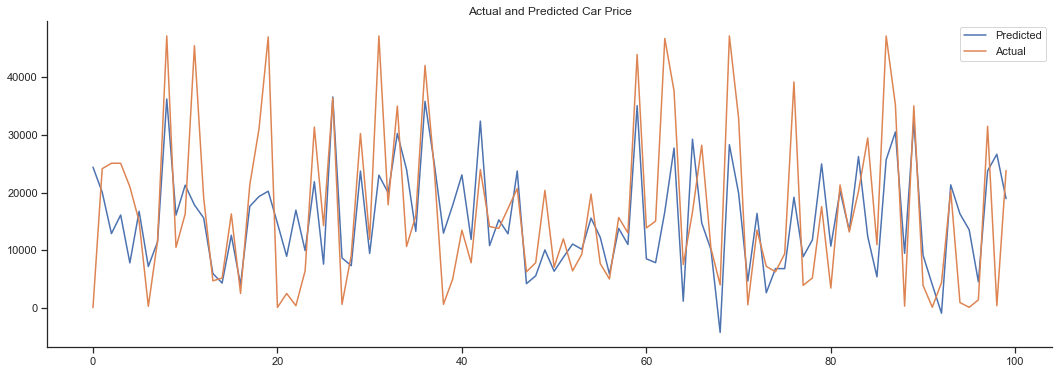

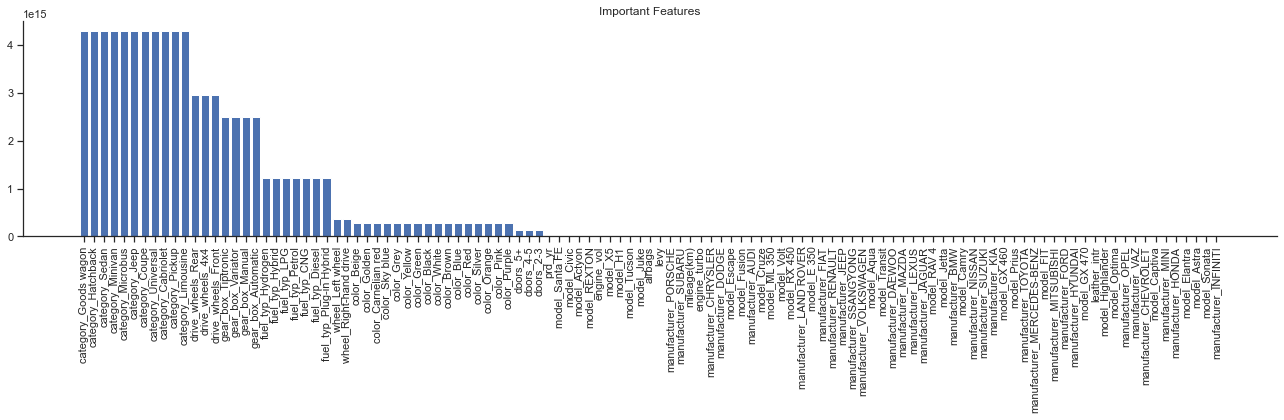

LinearRegression()

In [48]:
# Fitting Linear Regression Model
lr1 = LinearRegression()
analyse_model(lr1, X_train, X_test, y_train, y_test)